Week 3 Assignment
Meaghan Woody
UP221 Winter 2024

Census Data Exploration
This notebook analyzes data from the American Community Survey (5 Year Estimates) 2018-2022. 
Median Household Income (In 2022 Inflation Adjusted Dollars) will be explored across LA County census tracts.

## Part 1: Data set-up and data-cleaning

In [3]:
# Use pandas/geopandas to explore data
import pandas as pd

# Import census data
# note the relative filepath! where is this file located?
ct = pd.read_csv('Data/Week3Census.csv')

In [16]:
# Preview how the data looks
ct.shape
ct.head()

# note that our FIPS code, state, county columns are missing the leading zeroes
# re-import the data specifying FIPS as a string

ct = pd.read_csv(
    'Data Week 1-3/Week3Census.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

# make sure this works
ct.info(verbose=True, show_counts=True)

# see if that changes the columns
ct.shape
ct.head()
# we have 2498 tracts and 46 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   object 
 1   Geo_QName      2498 non-null   object 
 2   Geo_STUSAB     2498 non-null   object 
 3   Geo_SUMLEV     2498 non-null   int64  
 4   Geo_GEOCOMP    2498 non-null   int64  
 5   Geo_US         0 non-null      float64
 6   Geo_REGION     0 non-null      float64
 7   Geo_DIVISION   0 non-null      float64
 8   Geo_STATE      2498 non-null   object 
 9   Geo_COUNTY     2498 non-null   object 
 10  Geo_COUSUB     0 non-null      float64
 11  Geo_PLACE      0 non-null      float64
 12  Geo_TRACT      2498 non-null   int64  
 13  Geo_BLKGRP     0 non-null      float64
 14  Geo_CONCIT     0 non-null      float64
 15  Geo_AIANHH     0 non-null      float64
 16  Geo_AIANHHFP   0 non-null      float64
 17  Geo_AIHHTLI    0 non-null      float64
 18  Geo_AITS

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_PUMA5,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A14006_001
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.10,NaN,NaN,NaN,68972.0
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,NaN,NaN,NaN,NaN,NaN,Census Tract 1011.22,NaN,NaN,NaN,118859.0
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.20,NaN,NaN,NaN,65139.0
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.21,NaN,NaN,NaN,53348.0
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,NaN,NaN,NaN,06,037,...,NaN,NaN,NaN,NaN,NaN,Census Tract 1012.22,NaN,NaN,NaN,36779.0


In [4]:
# Data cleaning: condense our dataset to only the columns we need
# exclude columns with NA values
ct.columns[ct.isna().all()].tolist()
ct = ct.dropna(axis=1,how="all")

# check how to dataset looks now
ct
ct.head()
ct.shape
# reduced to 10 columns, still 2498 tracts

(2498, 10)

In [5]:
# Label the variables to analyze
keep = ['Geo_FIPS', 'SE_A14006_001']
ct2 = ct[keep]
keep = list(ct2)
ct2.columns = ['FIPS','Median Household Income']
ct2.head()

,FIPS,Median Household Income
0,6037101110,68972.0
1,6037101122,118859.0
2,6037101220,65139.0
3,6037101221,53348.0
4,6037101222,36779.0


In [6]:
# Use pandas/geopandas to explore data
import pandas as pd

# Import census data
# note the relative filepath! where is this file located?
ct = pd.read_csv('Data Week 1-3/Week3Census.csv')

In [24]:
ct

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_NAME,SE_A14006_001
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,06,037,101110,Census Tract 1011.10,68972.0
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,06,037,101122,Census Tract 1011.22,118859.0
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,06,037,101220,Census Tract 1012.20,65139.0
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ca,140,0,06,037,101221,Census Tract 1012.21,53348.0
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ca,140,0,06,037,101222,Census Tract 1012.22,36779.0
...,...,...,...,...,...,...,...,...,...,...
2493,06037980038,"Census Tract 9800.38, Los Angeles County, Cali...",ca,140,0,06,037,980038,Census Tract 9800.38,NaN
2494,06037980039,"Census Tract 9800.39, Los Angeles County, Cali...",ca,140,0,06,037,980039,Census Tract 9800.39,NaN
2495,06037990100,"Census Tract 9901, Los Angeles County, California",ca,140,0,06,037,990100,Census Tract 9901,NaN
2496,06037990200,"Census Tract 9902, Los Angeles County, California",ca,140,0,06,037,990200,Census Tract 9902,NaN


## Part 2: Summary statistics

<Axes: ylabel='Frequency'>

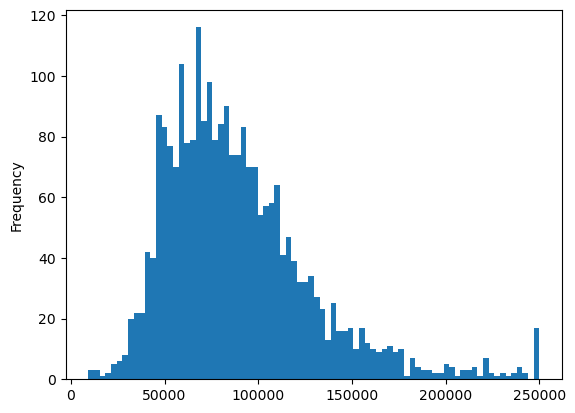

In [46]:
# mean, min, max, median of our median household income variable
ct2['Median Household Income'].describe()

# histogram distribution
ct2['Median Household Income'].plot.hist(bins=80)

<Axes: title={'center': '15 Poorest Census Tracts in Los Angeles County, Source: ACS 2018-2022'}, ylabel='FIPS'>

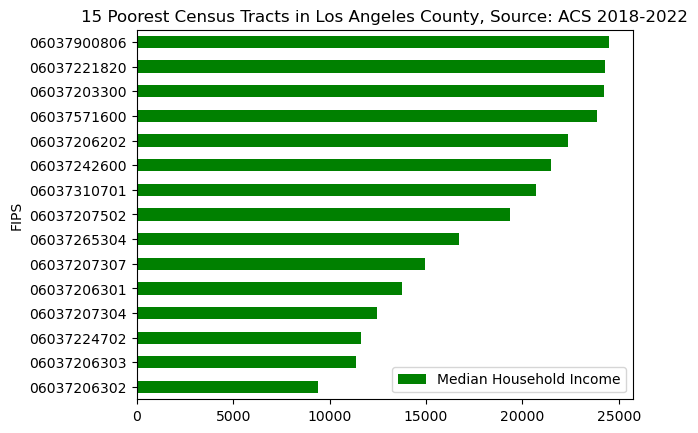

In [57]:
# 15 poorest census tracts

# sort values from lowest to highest
sort = ct2.sort_values(by='Median Household Income',ascending = True)
# display the bottom 15
sort[['FIPS','Median Household Income']].head(15)

# plot a histogram
sort.head(15).plot.barh(x='FIPS',
                            y='Median Household Income', 
                            title='15 Poorest Census Tracts in Los Angeles County, Source: ACS 2018-2022',
                            color='green')


## Part 3: Mapping

/opt/conda/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


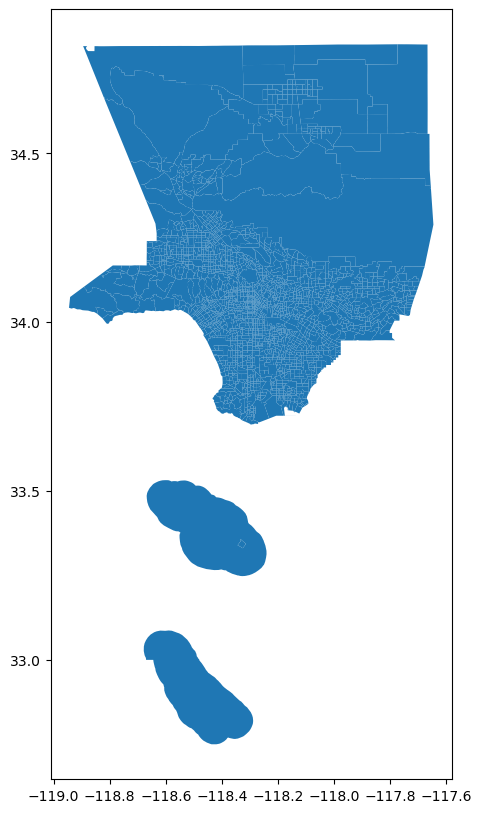

In [70]:
import geopandas as gpd

# import 2020 census tracts (source: LA Times)
tracts=gpd.read_file('Census_Tracts_2020.geojson')
tracts.head()

# we now have geometry, plot to see how it looks
tracts.plot(figsize=(12,10))

# condense the dataset geomtry and CT20	
tracts = tracts[['CT20','geometry']]

# add FIPS
tracts['FIPS'] ='06' + '037' + tracts['CT20']
# error code 

tracts.head()
# FIPS is in the last column

In [73]:
# merge our data: 2020 census tract geometry with social explorer

ctmap=tracts.merge(ct2,on="FIPS")
ctmap.head()
# we have CT20, geomtery, FIPS, income

,CT20,geometry,FIPS,Median Household Income
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,68972.0
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,118859.0
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,65139.0
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,53348.0
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,36779.0


<Axes: >

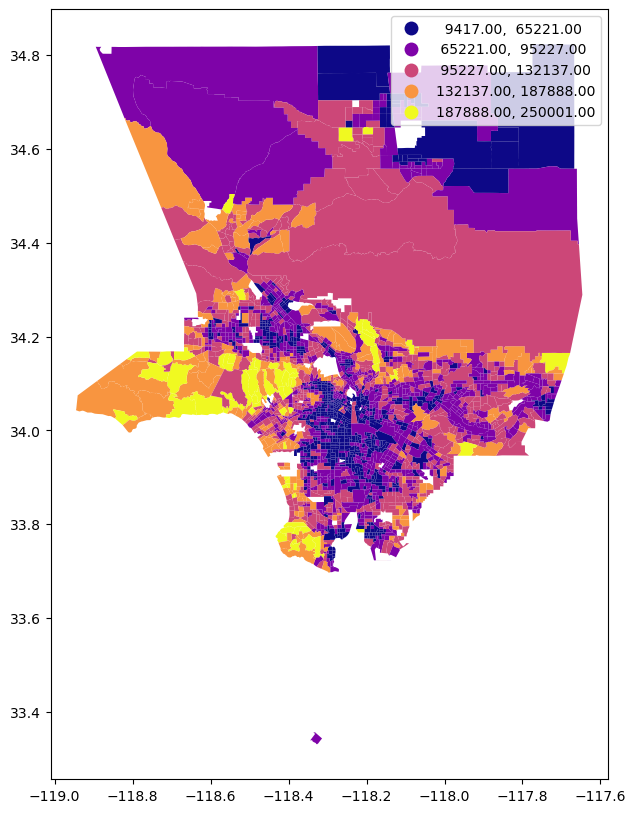

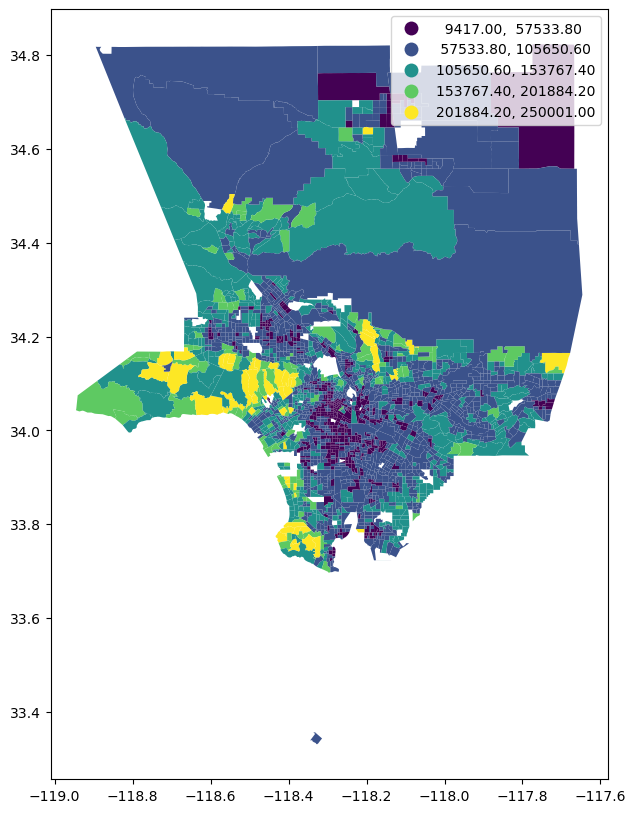

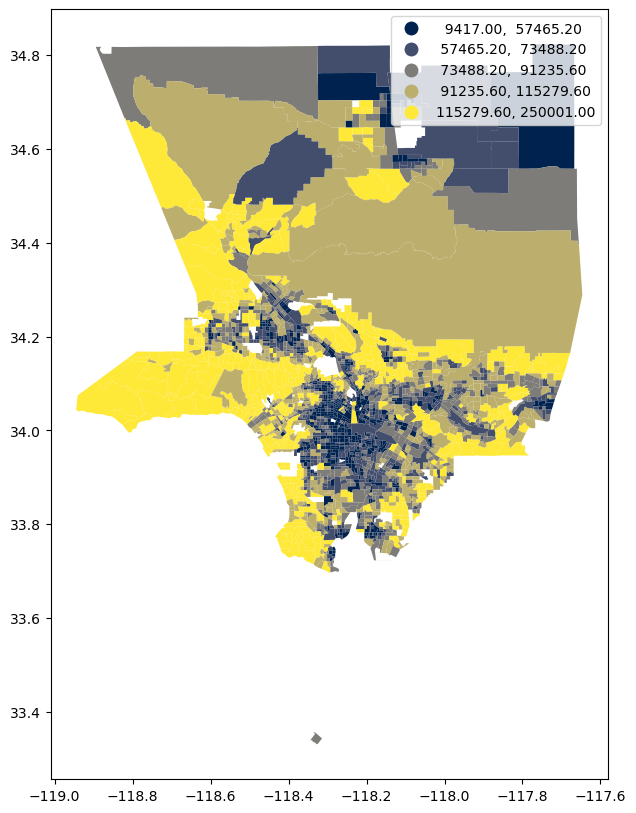

In [98]:
# choropleth maps
ctmap.plot(figsize=(12,10),
                 column='Median Household Income',
                 cmap='plasma',
                 legend=True, 
                 scheme='NaturalBreaks')
ctmap.plot(figsize=(12,10),
                 column='Median Household Income',
                 legend=True, 
                 scheme='equal_interval')
ctmap.plot(figsize=(12,10),
                 column='Median Household Income',
                 cmap='cividis',
                 legend=True, 
                 scheme='quantiles')

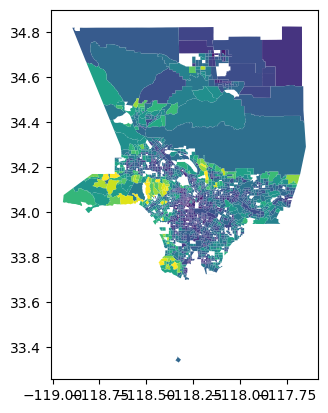

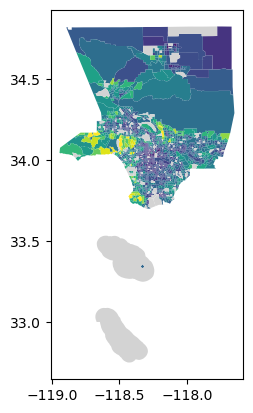

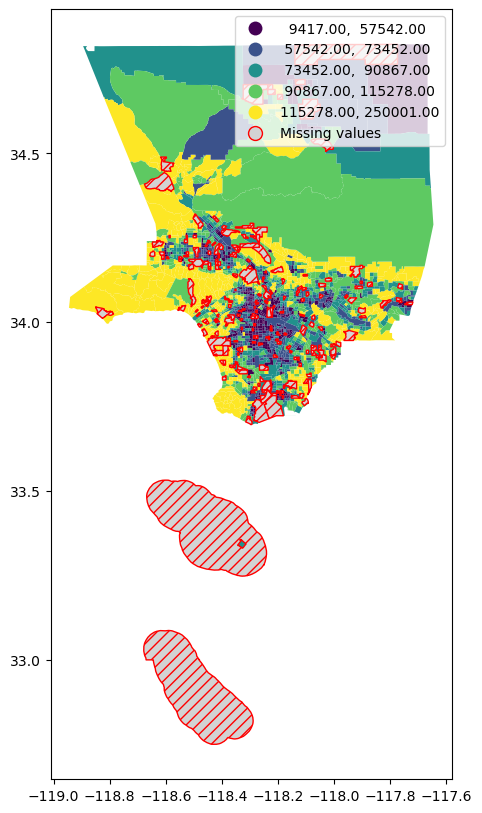

In [105]:
# what tracts have missing data
import numpy as np

ctmap.loc[np.random.choice(ctmap.index, 30), 'Median Household Income'] = np.nan
ctmap.plot(column='Median Household Income')

ctmap.plot(column='Median Household Income', missing_kwds={'color': 'lightgrey'});

ctmap.plot(
    column="Median Household Income",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);
